In [47]:
!pip install snowflake-connector-python

In [48]:
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder# One-hot encode categorical features
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


In [49]:
# Set up connection parameters
account = 'wu84517.central-india.azure'
user = 'ALPHIUS'
password = 'Alphiya003'
warehouse = 'COMPUTE_WH'
database = 'EMPLOYEELEARNING'
schema = 'USERS_MART'
table = 'MERGE'

# Establish connection
conn = snowflake.connector.connect(
    user=user,
    password=password,
    account=account,
    warehouse=warehouse,
    database=database,
    schema=schema
)

# Create a cursor object
cur = conn.cursor()

# Execute a query to select data from the table
cur.execute(f'SELECT * FROM EMPLOYEELEARNING.USERS_MART.MERGE')

# Fetch the results
rows = cur.fetchall()

# Close the cursor and connection
cur.close()
conn.close()
df = pd.DataFrame(rows, columns=[x[0] for x in cur.description])


In [50]:
df.to_csv("dataset.csv")

In [51]:
print(df.isnull().sum())

USER_ID             0
EVENT_ID            0
EVENT_NAME          0
DURATION_HOURS      0
START_DATE          0
END_DATE            0
PREREQUISITES       0
MODE                0
MEETING_LINK        0
VENUE               0
FIRST_NAME          0
LAST_NAME           0
DATE_OF_BIRTH       0
EMAIL               0
GENDER              0
PRIMARY_SKILL       0
EXPERIENCE_YEARS    0
DESIGNATION         0
ROLE                0
dtype: int64


In [52]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   USER_ID           1146 non-null   object
 1   EVENT_ID          1146 non-null   object
 2   EVENT_NAME        1146 non-null   object
 3   DURATION_HOURS    1146 non-null   int64 
 4   START_DATE        1146 non-null   object
 5   END_DATE          1146 non-null   object
 6   PREREQUISITES     1146 non-null   object
 7   MODE              1146 non-null   object
 8   MEETING_LINK      1146 non-null   object
 9   VENUE             1146 non-null   object
 10  FIRST_NAME        1146 non-null   object
 11  LAST_NAME         1146 non-null   object
 12  DATE_OF_BIRTH     1146 non-null   object
 13  EMAIL             1146 non-null   object
 14  GENDER            1146 non-null   object
 15  PRIMARY_SKILL     1146 non-null   object
 16  EXPERIENCE_YEARS  1146 non-null   int64 
 17  DESIGNATION   

In [53]:
print(df.describe())

       DURATION_HOURS  EXPERIENCE_YEARS
count     1146.000000       1146.000000
mean        35.156195          9.150960
std         23.783945          4.845822
min          1.000000          1.000000
25%         12.000000          5.000000
50%         31.000000          9.000000
75%         57.000000         13.000000
max         80.000000         17.000000


In [54]:
columns_to_drop = [ 'EVENT_ID','USER_ID','MEETING_LINK', 'VENUE', 'DATE_OF_BIRTH', 'EMAIL', 'FIRST_NAME', 'LAST_NAME', 'START_DATE', 'END_DATE', 'DURATION_HOURS']

df = df.drop(columns=columns_to_drop)


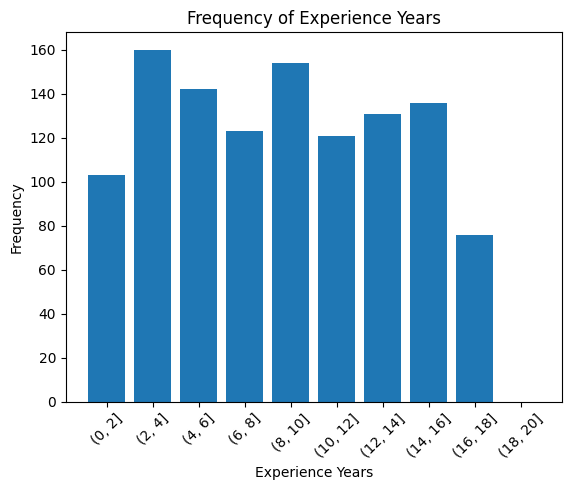

In [55]:

# Define bins for experience years
bins = [0,2,4,6,8,10,12,14,16,18,20]  # Example bins, you can adjust as needed

# Use pd.cut to categorize experience years into bins
experience_categories = pd.cut(df['EXPERIENCE_YEARS'], bins=bins)

# Count the frequency of employees in each category
frequency = experience_categories.value_counts().sort_index()

# Plot the bar graph
plt.bar(frequency.index.astype(str), frequency.values)
plt.title('Frequency of Experience Years')
plt.xlabel('Experience Years')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


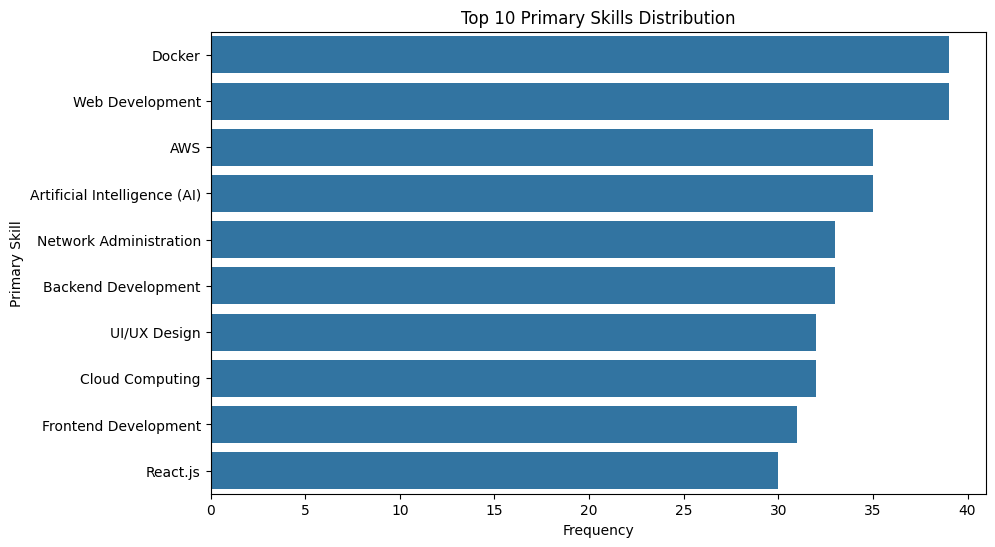

In [56]:
# Calculate the top N most frequent skills
top_skills = df['PRIMARY_SKILL'].value_counts().nlargest(10)  # Adjust the number as needed

# Plot the top N skills
plt.figure(figsize=(10, 6))
sns.barplot(x=top_skills.values, y=top_skills.index)
plt.title('Top 10 Primary Skills Distribution')
plt.xlabel('Frequency')
plt.ylabel('Primary Skill')
plt.show()


<ipython-input-57-91c30cb05404>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_experience.values, y=average_experience.index, palette='viridis')


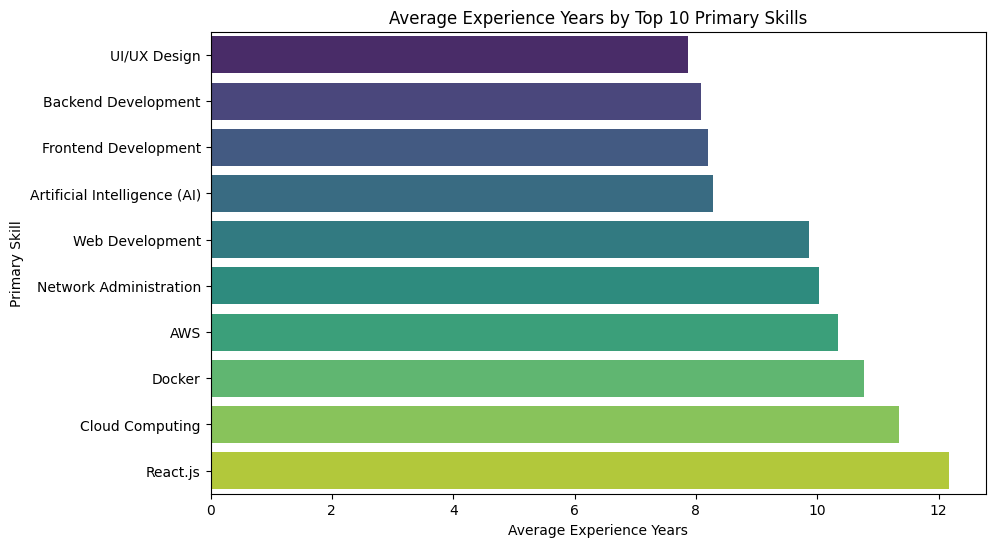

In [57]:
# Calculate the top N most frequent skills
top_skills = df['PRIMARY_SKILL'].value_counts().nlargest(10)  # Adjust the number as needed

# Filter the dataframe for only the top N skills
top_skills_df = df[df['PRIMARY_SKILL'].isin(top_skills.index)]

# Calculate the average experience years for each skill
average_experience = top_skills_df.groupby('PRIMARY_SKILL')['EXPERIENCE_YEARS'].mean().sort_values()

# Plot the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=average_experience.values, y=average_experience.index, palette='viridis')
plt.title('Average Experience Years by Top 10 Primary Skills')
plt.xlabel('Average Experience Years')
plt.ylabel('Primary Skill')
plt.show()



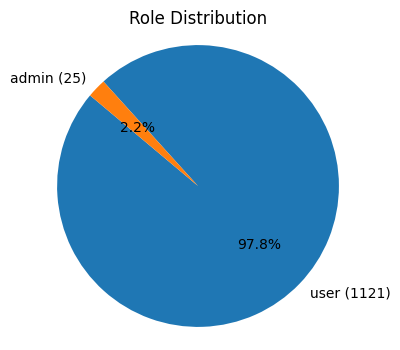

In [58]:
plt.figure(figsize=(4,4))
role_counts = df['ROLE'].value_counts()
plt.pie(role_counts, labels=[f'{role} ({count})' for role, count in zip(role_counts.index, role_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Role Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



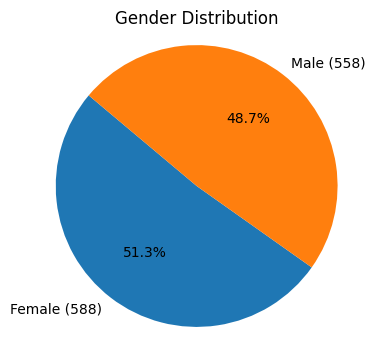

In [59]:
plt.figure(figsize=(4,4))
gender_counts = df['GENDER'].value_counts()
plt.pie(gender_counts, labels=[f'{gender} ({count})' for gender, count in zip(gender_counts.index, gender_counts)], autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [60]:
df_copy = df.copy()

In [61]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1146 entries, 0 to 1145
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EVENT_NAME        1146 non-null   object
 1   PREREQUISITES     1146 non-null   object
 2   MODE              1146 non-null   object
 3   GENDER            1146 non-null   object
 4   PRIMARY_SKILL     1146 non-null   object
 5   EXPERIENCE_YEARS  1146 non-null   int64 
 6   DESIGNATION       1146 non-null   object
 7   ROLE              1146 non-null   object
dtypes: int64(1), object(7)
memory usage: 71.8+ KB


In [62]:
# import pandas as pd
# from sklearn.feature_selection import f_classif, chi2
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # Assuming your DataFrame is named 'df'

# # Label encode the 'PRIMARY_SKILL', 'DESIGNATION', 'PREREQUISITES', and 'ROLE' columns
# label_encoder = LabelEncoder()
# df_copy['PRIMARY_SKILL_ENCODED'] = label_encoder.fit_transform(df_copy['PRIMARY_SKILL'])
# df_copy['DESIGNATION_ENCODED'] = label_encoder.fit_transform(df_copy['DESIGNATION'])
# df_copy['PREREQUISITE_ENCODED'] = label_encoder.fit_transform(df_copy['PREREQUISITES'])
# df_copy['ROLE_ENCODED'] = label_encoder.fit_transform(df_copy['ROLE'])




In [63]:
df_copy['EVENT_NAME'].value_counts()

EVENT_NAME
Software Engineering            42
Big Data                        39
Web Development                 38
Frontend Development            37
Scrum                           35
Google Cloud Platform (GCP)     35
Machine Learning                35
Enterprise Architecture         34
Node.js                         34
Python                          31
AWS                             31
Data Warehousing                30
ETL Processes                   29
Cybersecurity                   28
Java                            28
Data Analytics                  26
JavaScript                      26
Automation Testing              26
Technical Support               25
Microservices                   25
Kubernetes                      25
Mobile App Development          24
SQL                             24
Blockchain                      24
Database Management             24
Backend Development             23
Troubleshooting                 23
Cloud Computing                 23
React.js 

In [64]:
df_copy['PRIMARY_SKILL'].value_counts()

PRIMARY_SKILL
Docker                          39
Web Development                 39
AWS                             35
Artificial Intelligence (AI)    35
Network Administration          33
Backend Development             33
UI/UX Design                    32
Cloud Computing                 32
Frontend Development            31
React.js                        30
Agile Methodologies             30
Data Science                    30
Data Warehousing                30
Machine Learning                28
Database Management             28
Node.js                         28
API Development                 27
Data Analytics                  27
Mobile App Development          27
CI/CD                           26
Information Security            25
Automation Testing              25
Java                            24
HTML                            24
Cybersecurity                   22
IT Infrastructure               21
Snowflake                       21
Azure                           21
DevOps

In [65]:
df_copy['EXPERIENCE_YEARS'].value_counts()

EXPERIENCE_YEARS
6     90
4     88
10    83
17    76
16    74
3     72
12    71
9     71
13    68
8     64
14    63
15    62
7     59
1     55
5     52
11    50
2     48
Name: count, dtype: int64

In [66]:

# Define the RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Oversample the event counts DataFrame
X_resampled, y_resampled = oversampler.fit_resample(df_copy.drop(columns=['EVENT_NAME']), df_copy['EVENT_NAME'])

# Print the number of samples after oversampling
print(X_resampled.shape[0])

# Count the occurrences of each class after applying oversampling
print("Resampled class distribution:", Counter(y_resampled))


2016
Resampled class distribution: Counter({'HTML': 42, 'Database Management': 42, 'Data Analytics': 42, 'Big Data': 42, 'Mobile App Development': 42, 'Node.js': 42, 'Snowflake': 42, 'Data Warehousing': 42, 'Troubleshooting': 42, 'Docker': 42, 'Microservices': 42, 'Python': 42, 'Technical Support': 42, 'Scrum': 42, 'ETL Processes': 42, 'Network Administration': 42, 'Cloud Computing': 42, 'Java': 42, 'MongoDB': 42, 'React.js': 42, 'Kubernetes': 42, 'Artificial Intelligence (AI)': 42, 'Business Intelligence (BI)': 42, 'Enterprise Architecture': 42, 'Software Engineering': 42, 'DevOps': 42, 'Web Development': 42, 'Automation Testing': 42, 'JavaScript': 42, 'Data Science': 42, 'Machine Learning': 42, 'Blockchain': 42, 'SQL': 42, 'Google Cloud Platform (GCP)': 42, 'Cybersecurity': 42, 'Backend Development': 42, 'PowerBI': 42, 'IT Infrastructure': 42, 'UI/UX Design': 42, 'Agile Methodologies': 42, 'Frontend Development': 42, 'AWS': 42, 'API Development': 42, 'CI/CD': 42, 'Quality Assurance (

In [67]:
y_resampled.value_counts()

EVENT_NAME
HTML                            42
Database Management             42
Web Development                 42
Automation Testing              42
JavaScript                      42
Data Science                    42
Machine Learning                42
Blockchain                      42
SQL                             42
Google Cloud Platform (GCP)     42
Cybersecurity                   42
Backend Development             42
PowerBI                         42
IT Infrastructure               42
UI/UX Design                    42
Agile Methodologies             42
Frontend Development            42
AWS                             42
API Development                 42
CI/CD                           42
Quality Assurance (QA)          42
Information Security            42
Azure                           42
DevOps                          42
Software Engineering            42
Enterprise Architecture         42
Python                          42
Data Analytics                  42
Big Data 

In [68]:
X_resampled.shape

(2016, 7)

In [69]:
X_resampled.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PREREQUISITES     2016 non-null   object
 1   MODE              2016 non-null   object
 2   GENDER            2016 non-null   object
 3   PRIMARY_SKILL     2016 non-null   object
 4   EXPERIENCE_YEARS  2016 non-null   int64 
 5   DESIGNATION       2016 non-null   object
 6   ROLE              2016 non-null   object
dtypes: int64(1), object(6)
memory usage: 110.4+ KB


In [70]:
y_resampled.shape

(2016,)

In [71]:
y_resampled.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2016 entries, 0 to 2015
Series name: EVENT_NAME
Non-Null Count  Dtype 
--------------  ----- 
2016 non-null   object
dtypes: object(1)
memory usage: 15.9+ KB


In [72]:
X_resampled_df = pd.DataFrame(X_resampled)

# Initialize dictionary of LabelEncoders
label_encoders = {}

# Apply label encoding to each column individually
for column in X_resampled_df.columns:
    label_encoders[column] = LabelEncoder()
    X_resampled_df[column] = label_encoders[column].fit_transform(X_resampled_df[column])


***RANDOM FOREST***

In [73]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have imported necessary libraries and defined X_resampled and y_resampled

# Ensure y_resampled is one-dimensional
if len(y_resampled.shape) > 1:
    y_resampled = y_resampled.reshape(-1)

# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Encode target variable
y_encoded = label_encoder.fit_transform(y_resampled)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_encoded, test_size=0.2, random_state=42)

# Define the parameter grid to search through
param_grid = {
    'n_estimators': [50, 100, 150], # Number of trees in the forest
    'max_depth': [None, 10, 20], # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4] # Minimum number of samples required at each leaf node
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Prediction
y_pred = best_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Accuracy: 0.6113861386138614
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.43      0.50      0.46         6
           2       0.89      0.73      0.80        11
           3       0.70      0.88      0.78         8
           4       0.60      0.75      0.67         8
           5       0.80      1.00      0.89         8
           6       1.00      0.53      0.70        15
           7       0.67      0.22      0.33         9
           8       1.00      0.57      0.73         7
           9       0.75      0.90      0.82        10
          10       0.78      0.88      0.82         8
          11       0.89      1.00      0.94         8
          12       0.25      0.57      0.35         7
          13       0.80      0.40      0.53      

***LOGISTIC REGRESSION***

In [74]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Prediction
y_pred = lr_model.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))



Accuracy: 0.07425742574257425
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        11
           3       0.07      0.25      0.11         8
           4       0.00      0.00      0.00         8
           5       0.07      0.12      0.09         8
           6       0.15      0.20      0.17        15
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00        10
          10       0.33      0.12      0.18         8
          11       0.14      0.62      0.23         8
          12       0.13      0.29      0.18         7
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***SUPPORT VECTOR CLASSIFIER***

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_encoded, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model selection and training
svcmodel = SVC(kernel='linear', random_state=42)  # You can try different kernels like 'rbf', 'poly', etc.
svcmodel.fit(X_train_scaled, y_train)

# Prediction
y_pred = svcmodel.predict(X_test_scaled)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.11386138613861387
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.50      0.18      0.27        11
           3       0.10      0.25      0.14         8
           4       0.00      0.00      0.00         8
           5       0.10      0.12      0.11         8
           6       0.12      0.20      0.15        15
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.08      0.40      0.13        10
          10       0.43      0.38      0.40         8
          11       0.60      0.75      0.67         8
          12       0.22      0.29      0.25         7
          13       0.00      0.00      0.00        10
          14       1.00      0.14      0.25         7
          15       0.00      0.00      0.00        11
          16       0.00      0.00      0.00        

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***KNN***

In [76]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_encoded, test_size=0.2, random_state=42)

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Prediction
y_pred = knn_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.2871287128712871
              precision    recall  f1-score   support

           0       0.15      1.00      0.27         2
           1       0.15      0.50      0.23         6
           2       0.58      0.64      0.61        11
           3       0.41      0.88      0.56         8
           4       0.00      0.00      0.00         8
           5       0.58      0.88      0.70         8
           6       0.50      0.33      0.40        15
           7       0.00      0.00      0.00         9
           8       0.18      0.29      0.22         7
           9       0.42      0.50      0.45        10
          10       0.33      0.50      0.40         8
          11       0.86      0.75      0.80         8
          12       0.00      0.00      0.00         7
          13       0.10      0.10      0.10        10
          14       0.31      0.57      0.40         7
          15       0.58      0.64      0.61        11
          16       0.17      0.12      0.14         

***DECISION TREE***

In [77]:

X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_encoded, test_size=0.2, random_state=42)

# Initialize Decision Tree classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
decision_tree_classifier.fit(X_train, y_train)

# Prediction
y_pred = decision_tree_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.6435643564356436
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       0.38      0.50      0.43         6
           2       0.73      0.73      0.73        11
           3       0.88      0.88      0.88         8
           4       0.55      0.75      0.63         8
           5       0.80      1.00      0.89         8
           6       0.92      0.73      0.81        15
           7       0.57      0.44      0.50         9
           8       0.44      0.57      0.50         7
           9       1.00      0.90      0.95        10
          10       0.88      0.88      0.88         8
          11       0.89      1.00      0.94         8
          12       0.57      0.57      0.57         7
          13       0.50      0.40      0.44        10
          14       0.33      0.57      0.42         7
          15       0.59      0.91      0.71        11
          16       0.50      0.38      0.43         

***GAUSSIAN NAIVE BAYES***

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled_df, y_encoded, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier
naive_bayes_classifier.fit(X_train, y_train)

# Prediction
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.0891089108910891
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        11
           3       0.11      0.62      0.18         8
           4       0.00      0.00      0.00         8
           5       0.12      0.62      0.20         8
           6       0.08      0.20      0.12        15
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         7
           9       0.13      0.70      0.22        10
          10       0.50      0.12      0.20         8
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00        10
          14       1.00      0.14      0.25         7
          15       0.20      0.09      0.13        11
          16       0.00      0.00      0.00         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [160]:
# Define the new data in a dictionary format
new_data = {
    'PRIMARY_SKILL': [49],  # Example primary skill as a string
    'EXPERIENCE_YEARS': [25],  # Example experience years
}

# Create a DataFrame from the new data
new_df = pd.DataFrame(new_data)

# Select only the relevant columns used during training
new_df_selected = new_df[['PRIMARY_SKILL', 'EXPERIENCE_YEARS']]

# Encode categorical variables using one-hot encoding with a common prefix
new_df_encoded = pd.get_dummies(new_df_selected, prefix='dummy')

# Ensure all columns present during training are present in the prediction DataFrame
missing_cols = set(X_train.columns) - set(new_df_encoded.columns)
for col in missing_cols:
    new_df_encoded[col] = 0

# Reorder columns to match the order during training
new_df_encoded = new_df_encoded[X_train.columns]

# Print the new DataFrame
print("New DataFrame for prediction:")
print(new_df_encoded)
# Define the event names
event_names = [
    'HTML', 'Database Management', 'Web Development', 'Automation Testing', 'JavaScript',
    'Data Science', 'Machine Learning', 'Blockchain', 'SQL', 'Google Cloud Platform (GCP)',
    'Cybersecurity', 'Backend Development', 'PowerBI', 'IT Infrastructure', 'UI/UX Design',
    'Agile Methodologies', 'Frontend Development', 'AWS', 'API Development', 'CI/CD',
    'Quality Assurance (QA)', 'Information Security', 'Azure', 'DevOps', 'Software Engineering',
    'Enterprise Architecture', 'Python', 'Data Analytics', 'Big Data', 'Mobile App Development',
    'Node.js', 'Snowflake', 'Data Warehousing', 'Troubleshooting', 'Docker', 'Microservices',
    'Technical Support', 'Business Intelligence (BI)', 'Scrum', 'ETL Processes', 'Network Administration',
    'Cloud Computing', 'Java', 'MongoDB', 'React.js', 'Kubernetes', 'Artificial Intelligence (AI)',
    'CSS'
]

# Use the trained Decision Tree classifier (decision_tree_classifier) to make predictions on the new data
predicted_event_numeric = decision_tree_classifier.predict(new_df_encoded)

# Map the numeric predictions back to event names
predicted_event_names = [event_names[i] for i in predicted_event_numeric]

# Print the predicted next event
print("Predicted Next Event:", predicted_event_names)


New DataFrame for prediction:
   PREREQUISITES  MODE  GENDER  PRIMARY_SKILL  EXPERIENCE_YEARS  DESIGNATION  \
0              0     0       0             49                25            0   

   ROLE  
0     0  
Predicted Next Event: ['Artificial Intelligence (AI)']


In [161]:
new_df_encoded

,PREREQUISITES,MODE,GENDER,PRIMARY_SKILL,EXPERIENCE_YEARS,DESIGNATION,ROLE
0,0,0,0,49,25,0,0


In [162]:
# Fit the Random Forest classifier to the training data
rf_classifier.fit(X_train, y_train)

# Use the trained Random Forest classifier to make predictions on the new data
predicted_event_numeric = rf_classifier.predict(new_df_encoded)

# Map the numeric predictions back to event names
predicted_event_names = [event_names[i] for i in predicted_event_numeric]

# Print the predicted next event
print("Predicted Next Event:", predicted_event_names)


Predicted Next Event: ['Snowflake']


In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Define the list of primary skills
primary_skills = [
    'Docker', 'Web Development', 'AWS', 'Artificial Intelligence (AI)', 'Network Administration',
    'Backend Development', 'UI/UX Design', 'Cloud Computing', 'Frontend Development', 'React.js',
    'Agile Methodologies', 'Data Science', 'Data Warehousing', 'Machine Learning', 'Database Management',
    'Node.js', 'API Development', 'Data Analytics', 'Mobile App Development', 'CI/CD',
    'Information Security', 'Automation Testing', 'Java', 'HTML', 'Cybersecurity', 'IT Infrastructure',
    'Snowflake', 'Azure', 'DevOps', 'Microservices', 'Big Data', 'Troubleshooting', 'SQL',
    'Quality Assurance (QA)', 'PowerBI', 'Python', 'Software Engineering', 'Business Intelligence (BI)',
    'Scrum', 'Blockchain', 'CSS', 'Enterprise Architecture', 'Technical Support',
    'Google Cloud Platform (GCP)', 'Kubernetes', 'JavaScript', 'ETL Processes', 'MongoDB',
    'Embedded Systems'
]

# Define the list of event names
event_names = [
    'HTML', 'Database Management', 'Web Development', 'Automation Testing', 'JavaScript',
    'Data Science', 'Machine Learning', 'Blockchain', 'SQL', 'Google Cloud Platform (GCP)',
    'Cybersecurity', 'Backend Development', 'PowerBI', 'IT Infrastructure', 'UI/UX Design',
    'Agile Methodologies', 'Frontend Development', 'AWS', 'API Development', 'CI/CD',
    'Quality Assurance (QA)', 'Information Security', 'Azure', 'DevOps', 'Software Engineering',
    'Enterprise Architecture', 'Python', 'Data Analytics', 'Big Data', 'Mobile App Development',
    'Node.js', 'Snowflake', 'Data Warehousing', 'Troubleshooting', 'Docker', 'Microservices',
    'Technical Support', 'Business Intelligence (BI)', 'Scrum', 'ETL Processes', 'Network Administration',
    'Cloud Computing', 'Java', 'MongoDB', 'React.js', 'Kubernetes', 'Artificial Intelligence (AI)',
    'CSS'
]

# Combine primary skills and event names
all_skills = primary_skills

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform all skills to TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(all_skills)

# Function to predict events based on primary skills
def predict_events(input_skills, top_n=5):
    # Transform the input skills to TF-IDF representation
    input_skills_tfidf = vectorizer.transform([input_skills])

    # Calculate cosine similarity between the input skills and all existing events
    similarity_scores = cosine_similarity(input_skills_tfidf, tfidf_matrix)

    # Get indices of top similar events
    top_indices = similarity_scores.argsort(axis=1)[0][-top_n:]

    # Get recommended events based on similarity to input skills
    recommended_events = [all_skills[i] for i in top_indices]

    return recommended_events

# Example usage
input_skills = 'Web Development, Docker, Data Science'
recommended_events = predict_events(input_skills)
print("Recommended Events for Skills:", recommended_events)


Recommended Events for Skills: ['Big Data', 'Data Analytics', 'Docker', 'Web Development', 'Data Science']
